In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the Stock Market dataset

Data from www.statusinvest.com.br

In [110]:
file = 'statusinvest-busca-avancada.csv'

df = pd.read_csv('statusinvest-busca-avancada.csv', sep=';')
pd.set_option("display.max_columns", None)
df.head()

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,EV/EBIT,DIVIDA LIQUIDA / EBIT,DIV. LIQ. / PATRI.,PSR,P/CAP. GIRO,P. AT CIR. LIQ.,LIQ. CORRENTE,ROE,ROA,ROIC,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
0,AALR3,"13,98",NaN,"43,08","1,37","0,64","31,40","12,33","3,31","11,58","15,82","4,30","0,51","1,43","-36,80","-0,81","0,93","3,19","1,48","6,14","0,46","0,52","0,45","5,83",NaN,"12.739.093,67","10,19","0,32","-0,31","1.646.635.998,72"
1,ABCB4,"15,37","5,95","6,72","0,76","0,07","45,93","38,82","23,64","4,09","4,09",NaN,NaN,"1,59","0,93","-0,08","2,68","11,37","1,04",NaN,"0,09","0,91","0,04","1,17","5,92","14.384.654,25","20,15","2,29","0,12","3.479.526.916,02"
2,ABEV3,"14,79","4,10","14,63","2,67","1,72","51,93","27,80","22,84","12,02","11,17","-0,88","-0,20","3,34","32,71","-2,39","1,23","18,27","11,73","19,13","0,64","0,35","0,51","4,56","4,99","326.942.954,89","5,51","1,01","0,18","232.545.558.536,13"
3,ADHM3,"1,56",NaN,"-4,09","-1,29","105,12","100,00","-13.548,48","-18.860,61","-5,69","-5,69","0,00",NaN,"770,90","-1,43","-116,16","0,00","-31,47","-2.571,90","22,61","-81,72","82,72","0,14",NaN,NaN,NaN,"-1,21","-0,38","-0,58","25.439.770,20"
4,AERI3,"6,06",NaN,"69,83","4,58","1,57","9,96","7,06","2,52","24,92","27,61","2,86","0,53","1,76","3,41","-4,51","3,40","6,56","2,25","7,41","0,34","0,66","0,89",NaN,NaN,"14.592.805,47","1,33","0,09","-1,35","4.627.929.274,24"


## Variables

Ajustando os tipos das variáveis

#### Quantitativas

PRECO   
DY  
P/L     
P/ATIVOS    
MARGEM BRUTA    
MARG. LIQUID    
P/EBIT      
EV/EBIT 
DIVIDA LIQUIDA / EBIT   
DIV. LIQ. / EBIT    
DIV. LIQ. / PATRI.  
PSR 
P/CAP. GIRO 
P. AT CIR. LIQ.     
LIQ. CORRENTE   
ROE 
ROA     
ROIC    
PASSIVOS / ATIVOS    
GIRO ATIVOS             
CAGR RECEITAS 5 ANOS    
CAGR LUCROS 5 ANOS      
LIQUIDEZ MEDIA DIARIA  
VPA                    
LPA                   
PEG Ratio
VALOR DE MERCADO

In [111]:
# Removing dots
df = df.apply(lambda x: x.str.replace('.',''))

<ipython-input-111-d3c59126889b>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df = df.apply(lambda x: x.str.replace('.',''))


In [112]:
# Changing the commas for dots
df = df.apply(lambda x: x.str.replace(',','.'))

In [113]:
# New view
df.head()

,TICKER,PRECO,DY,P/L,P/VP,P/ATIVOS,MARGEM BRUTA,MARGEM EBIT,MARG. LIQUIDA,P/EBIT,EV/EBIT,DIVIDA LIQUIDA / EBIT,DIV. LIQ. / PATRI.,PSR,P/CAP. GIRO,P. AT CIR. LIQ.,LIQ. CORRENTE,ROE,ROA,ROIC,PATRIMONIO / ATIVOS,PASSIVOS / ATIVOS,GIRO ATIVOS,CAGR RECEITAS 5 ANOS,CAGR LUCROS 5 ANOS,LIQUIDEZ MEDIA DIARIA,VPA,LPA,PEG Ratio,VALOR DE MERCADO
0,AALR3,13.98,NaN,43.08,1.37,0.64,31.40,12.33,3.31,11.58,15.82,4.30,0.51,1.43,-36.80,-0.81,0.93,3.19,1.48,6.14,0.46,0.52,0.45,5.83,NaN,12739093.67,10.19,0.32,-0.31,1646635998.72
1,ABCB4,15.37,5.95,6.72,0.76,0.07,45.93,38.82,23.64,4.09,4.09,NaN,NaN,1.59,0.93,-0.08,2.68,11.37,1.04,NaN,0.09,0.91,0.04,1.17,5.92,14384654.25,20.15,2.29,0.12,3479526916.02
2,ABEV3,14.79,4.10,14.63,2.67,1.72,51.93,27.80,22.84,12.02,11.17,-0.88,-0.20,3.34,32.71,-2.39,1.23,18.27,11.73,19.13,0.64,0.35,0.51,4.56,4.99,326942954.89,5.51,1.01,0.18,232545558536.13
3,ADHM3,1.56,NaN,-4.09,-1.29,105.12,100.00,-13548.48,-18860.61,-5.69,-5.69,0.00,NaN,770.90,-1.43,-116.16,0.00,-31.47,-2571.90,22.61,-81.72,82.72,0.14,NaN,NaN,NaN,-1.21,-0.38,-0.58,25439770.20
4,AERI3,6.06,NaN,69.83,4.58,1.57,9.96,7.06,2.52,24.92,27.61,2.86,0.53,1.76,3.41,-4.51,3.40,6.56,2.25,7.41,0.34,0.66,0.89,NaN,NaN,14592805.47,1.33,0.09,-1.35,4627929274.24


In [115]:
quantitative_data = [i for i in df][1:]

print(f'Quantitative: {quantitative_data}')

for cols in quantitative_data:
    df[cols] = df[cols].apply(pd.to_numeric, errors='coerce') # Altering the columns to float
    
df.info()

Quantitative: ['PRECO', 'DY', 'P/L', 'P/VP', 'P/ATIVOS', 'MARGEM BRUTA', 'MARGEM EBIT', 'MARG. LIQUIDA', 'P/EBIT', 'EV/EBIT', 'DIVIDA LIQUIDA / EBIT', 'DIV. LIQ. / PATRI.', 'PSR', 'P/CAP. GIRO', 'P. AT CIR. LIQ.', 'LIQ. CORRENTE', 'ROE', 'ROA', 'ROIC', 'PATRIMONIO / ATIVOS', 'PASSIVOS / ATIVOS', 'GIRO ATIVOS', 'CAGR RECEITAS 5 ANOS', 'CAGR LUCROS 5 ANOS', ' LIQUIDEZ MEDIA DIARIA', ' VPA', ' LPA', ' PEG Ratio', ' VALOR DE MERCADO']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   TICKER                  600 non-null    object 
 1   PRECO                   600 non-null    float64
 2   DY                      347 non-null    float64
 3   P/L                     599 non-null    float64
 4   P/VP                    598 non-null    float64
 5   P/ATIVOS                599 non-null    float64
 6   MARGEM BRUTA            572 non

#### QuaLitativas

TICKER

In [53]:
s = pd.Series(['13999000.99', '1,2', '1.3'])
pd.to_numeric(s)

ValueError: Unable to parse string "1,2" at position 1

## Visual and statistical analysis in the introduction of all actions 

<AxesSubplot:xlabel='PRECO', ylabel='Count'>

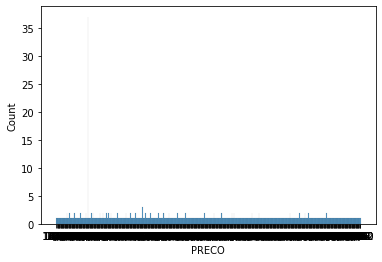

In [23]:
sns.histplot(df['PRECO'], bins = 10)